# Notebook description

Dataset: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

**Label**: SalePrice

**Feature**: 80 features regarding house location, construction type, environment, etc.

**Goal** : use data to build to predict house prices


# Importing the dataset

In [141]:
import pandas as pd
import numpy as np

In [142]:
df_train = pd.read_csv("train.csv")

In [ ]:
# df_test = pd.read_csv("test.csv")

In [143]:
X_train = df_train.drop("SalePrice", axis = 1)
y_train = df_train["SalePrice"]
y_train_norm = np.log(y_train)

# Data exploration

In [17]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


We want to explore numberice features and see what kind of distributions they show. Firstly we will use single variable plots. If data doesn't follow normal distribution we may want to transform it, so it can be used for models that perform better when data follow normal distribution.

## Single variable plots

### Label exploration

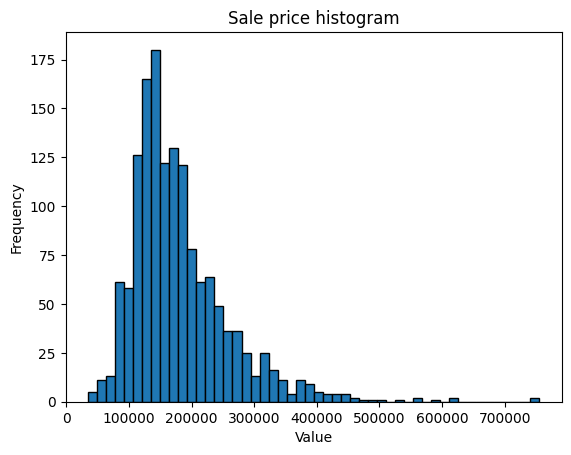

In [11]:
import matplotlib.pyplot as plt

sale_price = df_train["SalePrice"]
plt.hist(sale_price, bins=50, edgecolor='black')
plt.title('Sale price histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

We can see that SalePrice is right-skewed, we will transform it using logarithmic function to normalize it.

In [12]:
sale_price.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

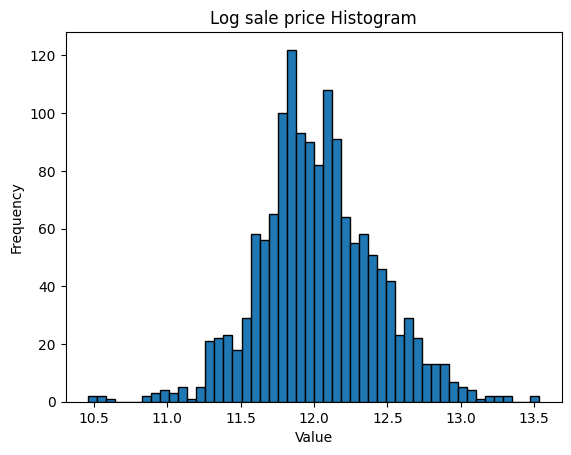

In [13]:
log_sale_price = np.log(sale_price)
plt.hist(log_sale_price, bins=50, edgecolor='black')
plt.title('Log sale price Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [14]:
log_sale_price.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [49]:
def explore_categorical_feature(feature_name: str):
    plt.hist(df_train[feature_name])
    plt.show()

In [44]:
def explore_numeric_feature(feature_name: str):
    plt.hist(df_train[feature_name])
    plt.show()
    
    plt.boxplot(df_train[feature_name])
    plt.show()
    
    print(df_train[feature_name].describe())
    
    df_train[feature_name].info()

### Exploring LotArea feature

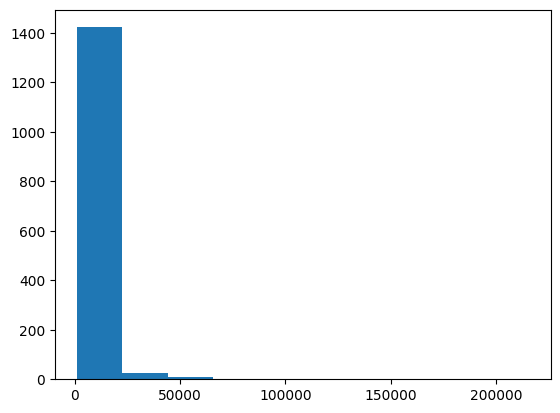

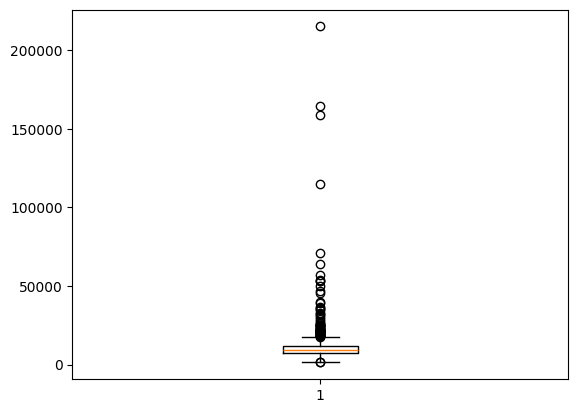

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: LotArea
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [41]:
explore_numeric_feature("LotArea")

A lot of outliers!

### Exploring YearBuilt

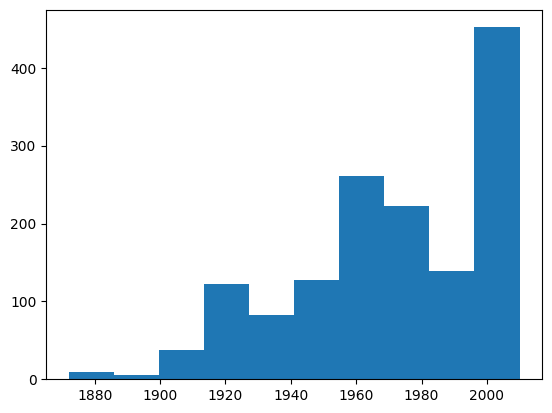

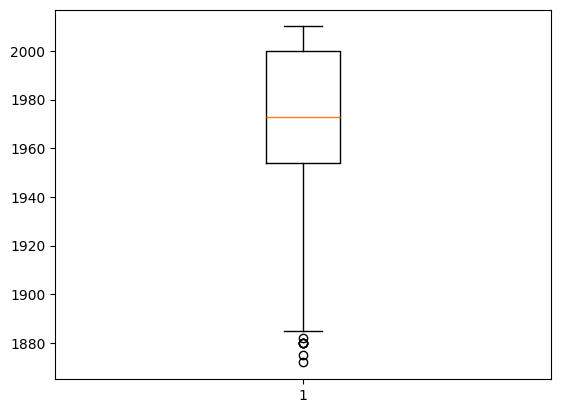

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: YearBuilt
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [42]:
explore_numeric_feature("YearBuilt")

### Exploring MSZoning

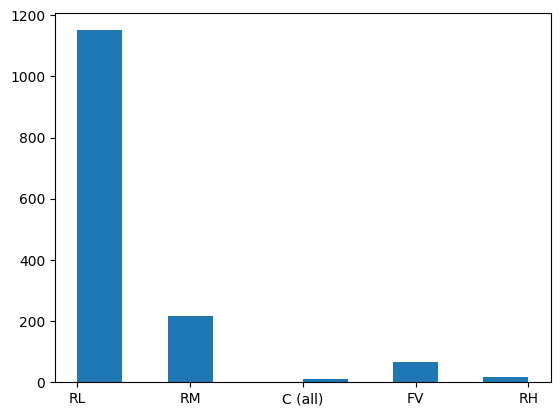

In [50]:
explore_categorical_feature("MSZoning")

### Exploring HouseStyle

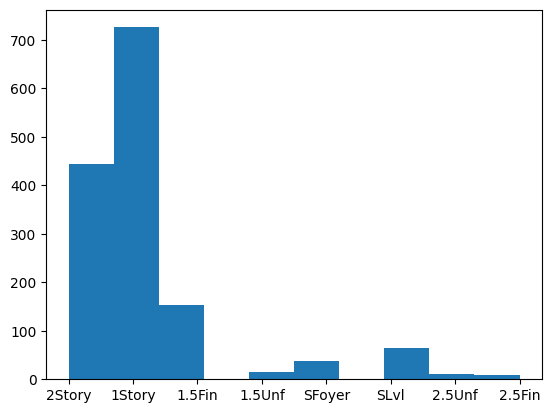

In [51]:
explore_categorical_feature("HouseStyle")

## Multi-Variable plots

### Scatter plots

In [57]:
y_train.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

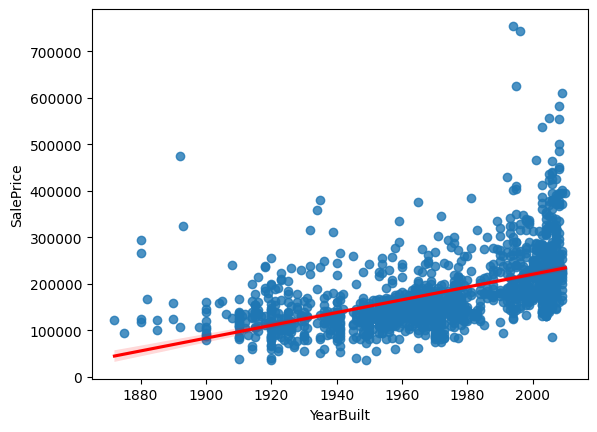

In [65]:
import seaborn as sns  

sns.regplot(x='YearBuilt', y='SalePrice', data = df_train, line_kws={"color": "red"})

There is some correlation!

<Axes: xlabel='LotArea', ylabel='SalePrice'>

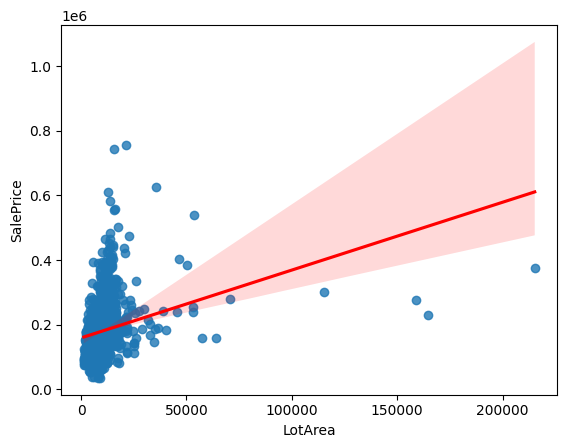

In [66]:
sns.regplot(x='LotArea', y='SalePrice', data = df_train, line_kws={"color": "red"})

Get rid of the outliers, than try to derive correlation.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

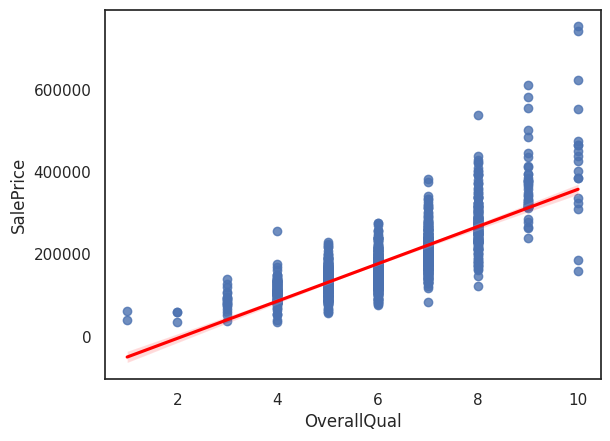

In [85]:
sns.regplot(x='OverallQual', y='SalePrice', data = df_train, line_kws={"color": "red"})

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

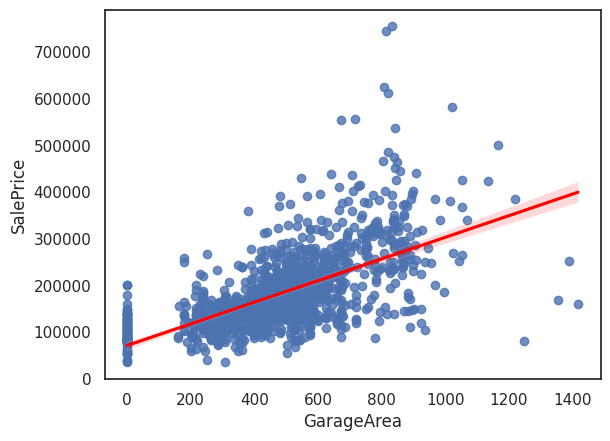

In [86]:
sns.regplot(x='GarageArea', y='SalePrice', data = df_train, line_kws={"color": "red"})

### Correlation matrices

In [68]:
numeric_df = df_train.select_dtypes(include=['int', 'float'])

<Axes: >

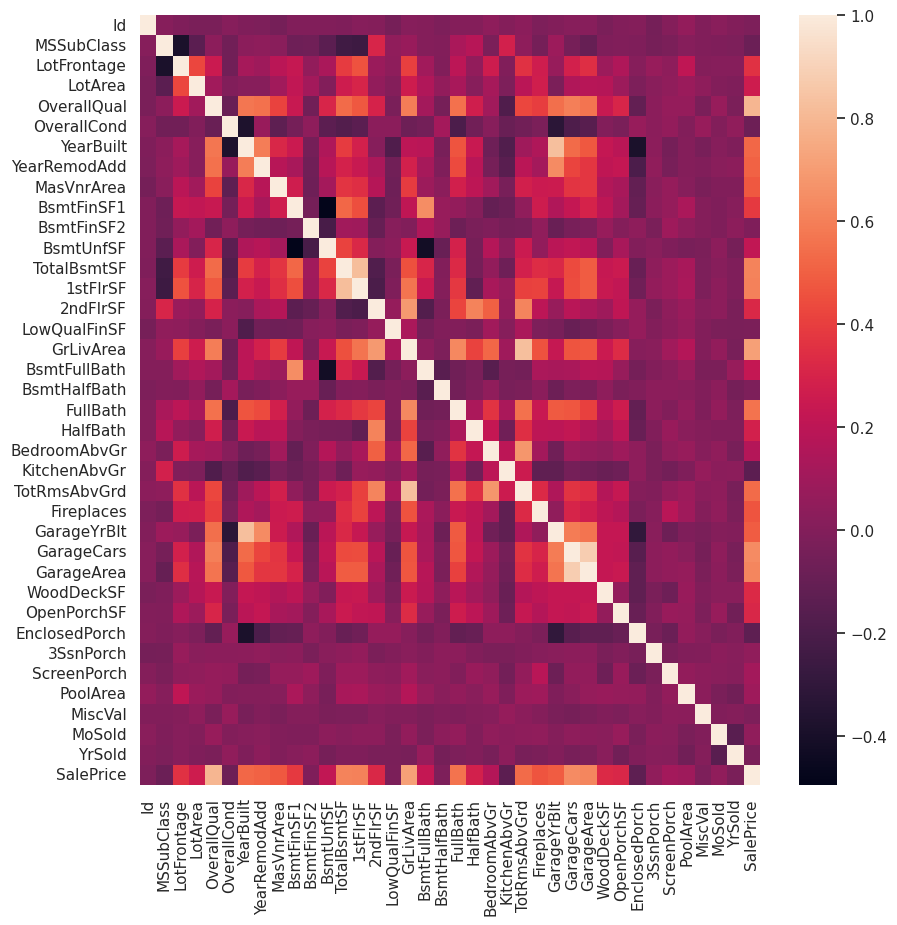

In [79]:
corr = numeric_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, )

SalePrice has high correlation with OverallQual, GrLivArea, GarageCars, GarageArea. Which is used to draw scatter plots.

### Pivot tables

In [82]:
pd.pivot_table(df_train, index = 'MSZoning', values = 'SalePrice')

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


In [84]:
pd.pivot_table(df_train, index = 'HouseStyle', values = 'SalePrice')

,SalePrice
HouseStyle,
1.5Fin,143116.740260
1.5Unf,110150.000000
1Story,175985.477961
2.5Fin,220000.000000
2.5Unf,157354.545455
2Story,210051.764045
SFoyer,135074.486486
SLvl,166703.384615


# Data preprocessing

In [144]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [145]:

# Define transformers for numerical and categorical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [146]:
# Update categorical and numerical columns
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

## Simplifying model for testing

In [8]:
categorical_columns_test = pd.Index(['MSZoning', 'HouseStyle'])

In [10]:
numerical_columns_test = pd.Index(['LotArea', 'YearBuilt', 'TotRmsAbvGrd'])

In [11]:
numerical_columns = numerical_columns_test
categorical_columns = categorical_columns_test

In [12]:
df_cats = X_train[categorical_columns_test]
df_cats

,MSZoning,HouseStyle
0,RL,2Story
1,RL,1Story
2,RL,2Story
3,RL,2Story
4,RL,2Story
...,...,...
1455,RL,2Story
1456,RL,1Story
1457,RL,2Story
1458,RL,1Story


In [13]:
df_nums = X_train[numerical_columns_test]
df_nums

,LotArea,YearBuilt,TotRmsAbvGrd
0,8450,2003,8
1,9600,1976,6
2,11250,2001,6
3,9550,1915,7
4,14260,2000,9
...,...,...,...
1455,7917,1999,7
1456,13175,1978,7
1457,9042,1941,9
1458,9717,1950,5


In [14]:
X_simple = pd.concat([df_nums, df_cats], axis=1)

In [15]:
X_train = X_simple

## Normal flow

In [147]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

In [148]:
# Apply the pipeline to your dataset
X = X_train
y = y_train_norm
X_preprocessed = pipeline.fit_transform(X)

In [96]:
X_preprocessed.shape

(1460, 304)

# PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

pca = PCA(n_components=n_components)
pipeline_pca = Pipeline(steps=
                        [('preprocessor', preprocessor),
                        ('pca', pca)])

X_pca = pipeline_pca.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Feature engineering

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)

    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)

In [ ]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df_train.drop('SalePrice', axis=1)
y = np.log(df_train['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Model training, prediction and evaluation

## Helper functions

In [180]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def calculate_regression_metrics(model_name: str, y_test: pd.Series, y_pred: np.ndarray):
    print("Model name: " + model_name)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae}")
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")

    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error: {rmse}")
    
    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2}")
    
    n = X.shape[0]  # Number of samples
    p = X.shape[1]  # Number of predictors

    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    print(f"Adjusted R-squared: {adjusted_r2}")

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,
                            y, test_size=0.2, random_state=42)

## Linear regression

In [181]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

calculate_regression_metrics(model_name=regressor.__class__.__name__, y_test=y_test, y_pred=pred)

Model name: LinearRegression
Mean Absolute Error: 0.09035781668064699
Mean Squared Error: 0.01745526265379102
Root Mean Squared Error: 0.1321183660729689
R-squared: 0.9064630321657422
Adjusted R-squared: 0.9010366670992153


## Polynomial regression

In [192]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 3)

X_poly = poly_reg.fit_transform(X_train)

lin_reg = LinearRegression()

In [193]:
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [194]:

X_poly_test = poly_reg.transform(X_test)

pred = lin_reg.predict(X_poly_test)

calculate_regression_metrics("Polynomial Regression", y_test=y_test, y_pred=pred)

Model name: Polynomial Regression
Mean Absolute Error: 0.09446018495308263
Mean Squared Error: 0.020997486595982513
Root Mean Squared Error: 0.14490509513465188
R-squared: 0.8874814279633818
Adjusted R-squared: 0.8809538820874359


## XGBoost

In [186]:
from xgboost import XGBRegressor

# Instantiation
xgb_r = XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

pred = xgb_r.predict(X_test)

calculate_regression_metrics(model_name=xgb_r.__class__.__name__, y_test=y_test, y_pred=pred)

Model name: XGBRegressor
Mean Absolute Error: 0.10654408368768246
Mean Squared Error: 0.024762636896563738
Root Mean Squared Error: 0.15736148479397283
R-squared: 0.8673052352848877
Adjusted R-squared: 0.8596072068750189


## Decision Tree Regression model

In [187]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

calculate_regression_metrics(model_name=regressor.__class__.__name__, y_test=y_test, y_pred=pred)

Model name: DecisionTreeRegressor
Mean Absolute Error: 0.1433036392526448
Mean Squared Error: 0.0399103476815621
Root Mean Squared Error: 0.19977574347643434
R-squared: 0.7861336731857457
Adjusted R-squared: 0.7737266346468477


## Random forest regressor

In [188]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

calculate_regression_metrics(model_name=regressor.__class__.__name__, y_test=y_test, y_pred=pred)

Model name: RandomForestRegressor
Mean Absolute Error: 0.10572431590877944
Mean Squared Error: 0.024258279165057125
Root Mean Squared Error: 0.15575069555240234
R-squared: 0.8700079212223374
Adjusted R-squared: 0.8624666838748297


## SVM regressor

In [189]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

calculate_regression_metrics(model_name=regressor.__class__.__name__, y_test=y_test, y_pred=pred)

Model name: SVR
Mean Absolute Error: 0.10044430947149405
Mean Squared Error: 0.023041814858779548
Root Mean Squared Error: 0.1517953057863765
R-squared: 0.8765265502996888
Adjusted R-squared: 0.8693634785259217


## ANN

In [195]:
import tensorflow as tf

ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # softmax if output is non-categorical

2024-08-27 18:53:58.734232: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-27 18:53:58.746361: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 18:53:58.748713: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-27 18:53:58.754385: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 18:53:58.765237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [196]:
ann.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [208]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [209]:
ann.fit(X_train, y_train, batch_size = 128, epochs = 20)

IndexError: tuple index out of range

In [ ]:
pred = ann.predict(X_test)

calculate_regression_metrics(model_name=regressor.__class__.__name__, y_test=y_test, y_pred=pred)

## MLP regressor

In [191]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

mlp.fit(X_train, y_train)

pred = mlp.predict(X_test)

calculate_regression_metrics(model_name=mlp.__class__.__name__, y_test=y_test, y_pred=pred)

Model name: MLPRegressor
Mean Absolute Error: 0.1279737111722335
Mean Squared Error: 0.03172158445503881
Root Mean Squared Error: 0.1781055430216556
R-squared: 0.8300145415355158
Adjusted R-squared: 0.8201531661351106


## Exporting the model

In [20]:
import joblib

joblib.dump(regressor, 'linear_reg_model.joblib')

['linear_reg_model.joblib']

## Feature importance analysis

In [182]:
xgb_r.get_booster().get_score(importance_type='gain')

{'f0': 0.023572351783514023,
 'f1': 0.11299675703048706,
 'f2': 0.11849069595336914,
 'f3': 0.1337750405073166,
 'f4': 9.610414505004883,
 'f5': 0.20888210833072662,
 'f6': 0.2207522690296173,
 'f7': 0.20844900608062744,
 'f8': 0.07683556526899338,
 'f9': 0.20493102073669434,
 'f10': 0.022307485342025757,
 'f11': 0.06604330241680145,
 'f12': 0.48891645669937134,
 'f13': 0.27347609400749207,
 'f14': 0.12873591482639313,
 'f16': 1.0125157833099365,
 'f17': 0.12913253903388977,
 'f19': 1.3696389198303223,
 'f20': 0.08872239291667938,
 'f21': 0.1434684693813324,
 'f22': 0.28251025080680847,
 'f23': 0.10827159881591797,
 'f24': 0.5962008237838745,
 'f25': 0.18222452700138092,
 'f26': 2.4421818256378174,
 'f27': 0.25802701711654663,
 'f28': 0.06492456793785095,
 'f29': 0.1691308468580246,
 'f30': 0.06978145241737366,
 'f32': 0.045749519020318985,
 'f35': 0.014755897223949432,
 'f36': 0.0573868453502655,
 'f38': 0.05645735561847687,
 'f41': 0.37058886885643005,
 'f46': 0.12453092634677887,
 '

## Example prediction (1 row)

In [175]:
x_example = df_train.iloc[[0]]

price_example = x_example["SalePrice"]

x_example = x_example.drop(["SalePrice"], axis=1)

x_example = pipeline.transform(x_example)

predicted_price = xgb_r.predict(x_example)

print("Real price: " + str(price_example[0]))
print("Predicted price: " + str(np.exp(predicted_price[0])))

Real price: 208500
Predicted price: 202092.95


# Submission

## Polynomial regression

In [ ]:
X_preprocessed_test = pipeline_fe.fit_transform(df_test)

In [ ]:
X_poly_test = poly_reg.fit_transform(X_preprocessed_test)

In [ ]:
pred = lin_reg.predict(X_poly_test)

df_stack_out = df_test[['Id']].copy()
df_stack_out['SalePrice'] = pred

df_stack_out.to_csv('submission_poly_reg.csv', index=False)